# История
### у меня на мегафоне лежало 638.12 рублей и конкретное число комиссии на вывод средств с мегафона на карточку не указано. Я попытался итеративно и нативно аппроксимировать функцию оценки комиссии. Сначала я думал, что это график y = ax+b, но с каждой итерацией я понимал, что график нелинейный. Тоесть каждый раз когда я выбирал сколько хочу снять средств и мне в пуше приходило сообщение о выводе баланса и посчитанной комиссией неизвестно как. 


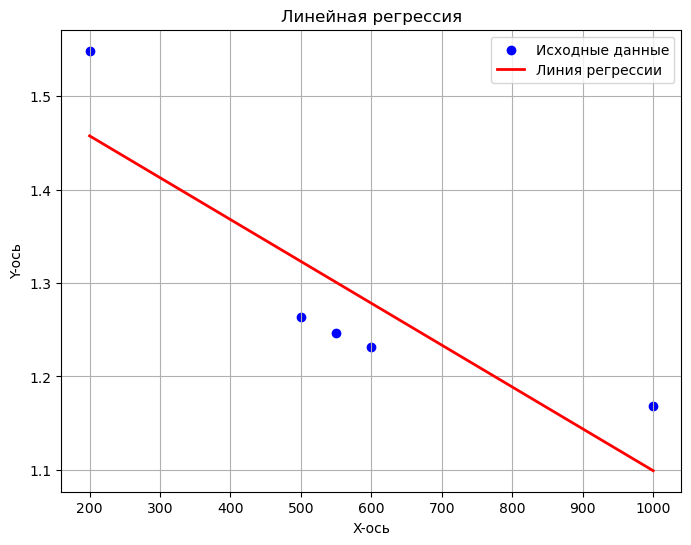

Коэффициент наклона (slope): -0.00
Свободный член (intercept): 1.55


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Генерация данных (пример)
# Замените эти данные своими
x = np.array([200, 500, 550, 600, 1000]).reshape((-1, 1))
y = np.array([1.5485, 1.2635, 1.2462, 1.2318, 1.1685])

# 2. Создание и обучение модели
model = LinearRegression()
model.fit(x, y)

# 3. Предсказание на основе модели
y_pred = model.predict(x)

# 4. Вывод графика
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(x, y_pred, color='red', linewidth=2, label='Линия регрессии')

# Настройка графика
plt.title('Линейная регрессия')
plt.xlabel('X-ось')
plt.ylabel('Y-ось')
plt.legend()
plt.grid(True)
plt.show()

# 5. Вывод коэффициентов модели
print(f"Коэффициент наклона (slope): {model.coef_[0]:.2f}")
print(f"Свободный член (intercept): {model.intercept_:.2f}")

### Сначала построил линейную функцию, но 10000 показала, что это нелинейная и я решил сделать аппроксимировать полином второй степени

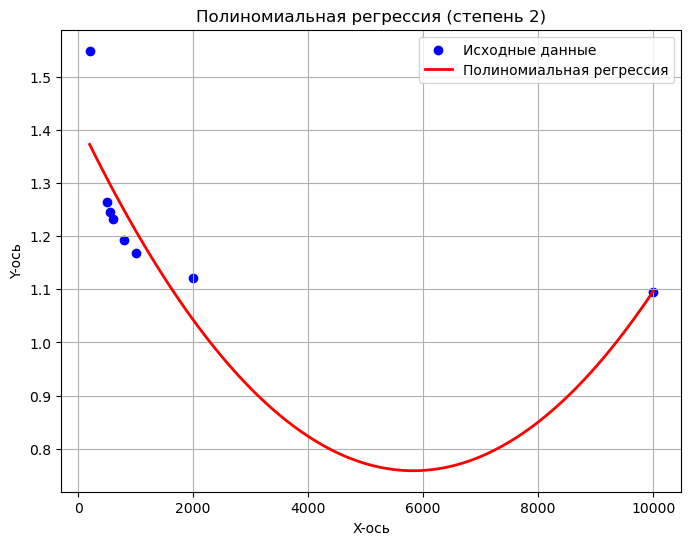

Коэффициенты модели:
Свободный член (intercept): 1.42
Коэффициенты (coefficients): [ 0.00000000e+00 -2.25828999e-04  1.93778936e-08]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# 1. Генерация данных (пример)
# Замените эти данные своими.
x = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000]).reshape((-1, 1))
y = np.array([1.5485, 1.2635, 1.2462, 1.2318, 1.1685, 1.1922, 1.121, 1.0944])

# 2. Преобразование данных в полиномиальные
# Мы используем степень 2, но вы можете изменить degree на любую другую.
# Например, degree=3 для кубической функции.
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

# 3. Создание и обучение модели
# Теперь мы обучаем обычную линейную регрессию на преобразованных данных.
model = LinearRegression()
model.fit(x_poly, y)

# 4. Предсказание на основе модели
y_pred = model.predict(x_poly)

# 5. Вывод графика
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Исходные данные')
# Для построения плавной кривой мы используем x_grid
x_grid = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_grid_poly = polynomial_features.transform(x_grid)
y_grid_pred = model.predict(x_grid_poly)
plt.plot(x_grid, y_grid_pred, color='red', linewidth=2, label='Полиномиальная регрессия')

# Настройка графика
plt.title('Полиномиальная регрессия (степень 2)')
plt.xlabel('X-ось')
plt.ylabel('Y-ось')
plt.legend()
plt.grid(True)
plt.show()

# 6. Вывод коэффициентов модели
print("Коэффициенты модели:")
print(f"Свободный член (intercept): {model.intercept_:.2f}")
print(f"Коэффициенты (coefficients): {model.coef_}")


# Когда построил параболу, то понял, что это не логично с точки бизнеса и начал аппроксимировать функцию прямой пропорциональности вида y = 1/x + slope + 1


# +1 сделал, потому что если комиссия  >=1, то мегафон  либо не будет брать комиссию, либо приплачивать, что с точки зрения здравого смысла и бизнеса - невозможно

# то есть веточка нашей функции будет бесконечно стремиться, но не достигнет y = 1

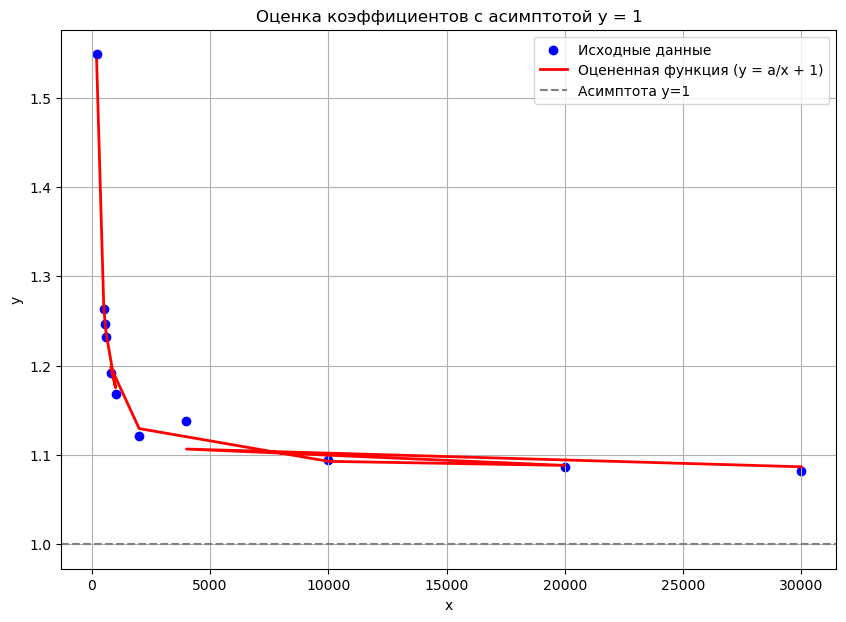

Оцененный коэффициент 'a': 91.67
Свободный член (ожидается около 0): 0.08


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000, 20000, 4000, 30000])
y_target = np.array([1.5485, 1.2635, 1.2462, 1.2318, 1.1685, 1.1922, 1.121, 1.0944, 1.0864, 1.1382, 1.0821])

# 2. Линеаризация данных с учетом асимптоты y=1
# Создаем новые переменные X = 1/x и Y = y - 1.
X_new = (1 / x_original).reshape(-1, 1)
Y_new = y_target - 1 

# 3. Обучение линейной регрессии
model = LinearRegression()
model.fit(X_new, Y_new)

# 4. Предсказание и восстановление исходной функции
y_pred_linear = model.predict(X_new)
y_pred_original = y_pred_linear + 1 

# 5. Вывод графика
plt.figure(figsize=(10, 7))

# Исходные данные
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Оцененная функция
plt.plot(x_original, y_pred_original, color='red', linewidth=2, label='Оцененная функция (y = a/x + 1)')

# Настройка графика
plt.title('Оценка коэффициентов с асимптотой y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Добавляем горизонтальную линию асимптоты
plt.axhline(y=1, color='gray', linestyle='--', label='Асимптота y=1')
plt.legend()
plt.show()

# 6. Вывод оцененного коэффициента
print(f"Оцененный коэффициент 'a': {model.coef_[0]:.2f}")
print(f"Свободный член (ожидается около 0): {model.intercept_:.2f}")

In [5]:
x_test = 4000.0
print(f'оценка {model.coef_[0] / x_test  + model.intercept_ + 1} для {x_test}')

оценка 1.1065437631991433 для 4000.0


In [6]:
x_test = 30000.0
print(f'оценка {model.coef_[0] / x_test  + model.intercept_ + 1} для {x_test}')

оценка 1.0866829443693142 для 30000.0


In [7]:
x_test = 59999.0
print(f'оценка {model.coef_[0] / x_test  + model.intercept_ + 1} для {x_test}')

оценка 1.0851552145377246 для 59999.0


# Гемини помог причесать график и сделать его гладким

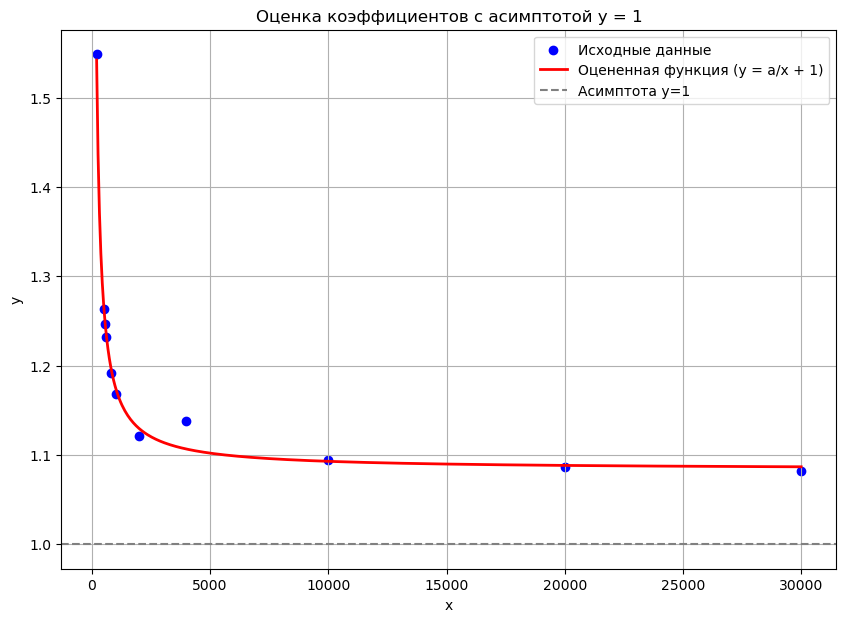

Оцененный коэффициент 'a': 91.6653
Свободный член (ожидается около 0): 0.0836


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000, 20000, 4000, 30000])
y_target = np.array([1.5485, 1.2635, 1.2462, 1.2318, 1.1685, 1.1922, 1.121, 1.0944, 1.0864, 1.1382, 1.0821])

# 2. Линеаризация данных с учетом асимптоты y=1
# Создаем новые переменные X = 1/x и Y = y - 1.
X_new = (1 / x_original).reshape(-1, 1)
Y_new = y_target - 1 

# 3. Обучение линейной регрессии
model = LinearRegression()
model.fit(X_new, Y_new)

# 4. Построение непрерывной линии регрессии
# Создаем новую, более плотную сетку значений x.
x_plot = np.linspace(x_original.min(), x_original.max(), 500)
# Линеаризуем эту новую сетку.
X_plot_new = (1 / x_plot).reshape(-1, 1)
# Предсказываем значения y для этой плотной сетки.
y_plot_pred = model.predict(X_plot_new) + 1 # Не забываем добавить асимптоту

# 5. Вывод графика
plt.figure(figsize=(10, 7))

# Исходные данные
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Оцененная непрерывная функция
plt.plot(x_plot, y_plot_pred, color='red', linewidth=2, label='Оцененная функция (y = a/x + 1)')

# Настройка графика
plt.title('Оценка коэффициентов с асимптотой y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Добавляем горизонтальную линию асимптоты
plt.axhline(y=1, color='gray', linestyle='--', label='Асимптота y=1')
plt.legend()
plt.show()

# 6. Вывод оцененного коэффициента
print(f"Оцененный коэффициент 'a': {model.coef_[0]:.4f}")
print(f"Свободный член (ожидается около 0): {model.intercept_:.4f}")

# хочу сделать так, чтобы вытащить свои деньги с минимальной комиссией и с минимальными остатком на балансе

# хоче построить производную на этой аппроксимированной функции и найти самое выгодное соотношение докинуть денег/вывести с минимальной комсой  (я забил 
### я хотел бы как можно меньше закинуть денег, но как можно больше вытащить денег с меньшей комсой


## 4000 навевают подозрения, они выбиваются из общего графика. наверное там есть какой-то порог, после которого комса резко падает. Оценим y_hat и посмотрим на y_true


In [9]:
x_test = 5000
print(f'оценка y_hat: {model.coef_[0] / x_test  + model.intercept_ + 1} для {x_test}')

оценка y_hat: 1.1019604973153365 для 5000


## y_hat = 1.1019 - комиссия примерно 10%
## по факту чтобы вывести 5000 рублей, то с комиссией будет 5626.5
## следовательно 5625.5 / 5000 = 1,1251 - примерно 12 процентов
## ошибка вышла в 2 %, внесу новые эмпиритивные данные

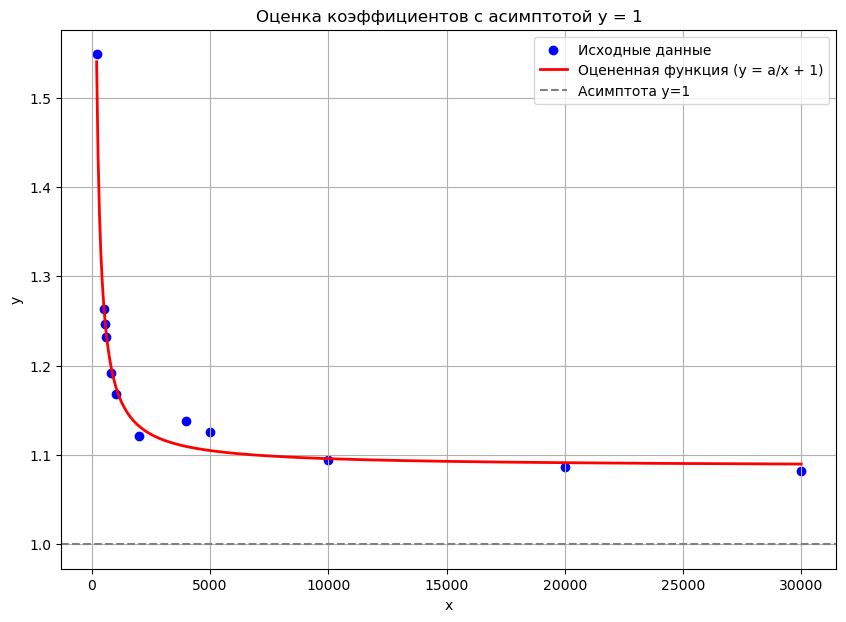

Оцененный коэффициент 'a': 90.6594
Свободный член (ожидается около 0): 0.0867


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000, 20000, 4000, 30000, 5000])
y_target = np.array([1.5485, 1.2635, 1.2462, 1.2318, 1.1685, 1.1922, 1.121, 1.0944, 1.0864, 1.1382, 1.0821, 1.1251])

# 2. Линеаризация данных с учетом асимптоты y=1
# Создаем новые переменные X = 1/x и Y = y - 1.
X_new = (1 / x_original).reshape(-1, 1)
Y_new = y_target - 1 

# 3. Обучение линейной регрессии
model = LinearRegression()
model.fit(X_new, Y_new)

# 4. Построение непрерывной линии регрессии
# Создаем новую, более плотную сетку значений x.
x_plot = np.linspace(x_original.min(), x_original.max(), 500)
# Линеаризуем эту новую сетку.
X_plot_new = (1 / x_plot).reshape(-1, 1)
# Предсказываем значения y для этой плотной сетки.
y_plot_pred = model.predict(X_plot_new) + 1 # Не забываем добавить асимптоту

# 5. Вывод графика
plt.figure(figsize=(10, 7))

# Исходные данные
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Оцененная непрерывная функция
plt.plot(x_plot, y_plot_pred, color='red', linewidth=2, label='Оцененная функция (y = a/x + 1)')

# Настройка графика
plt.title('Оценка коэффициентов с асимптотой y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Добавляем горизонтальную линию асимптоты
plt.axhline(y=1, color='gray', linestyle='--', label='Асимптота y=1')
plt.legend()
plt.show()

# 6. Вывод оцененного коэффициента
print(f"Оцененный коэффициент 'a': {model.coef_[0]:.4f}")
print(f"Свободный член (ожидается около 0): {model.intercept_:.4f}")

In [11]:
x_test = 5000
print(f'оценка y_hat: {model.coef_[0] / x_test  + model.intercept_ + 1} для {x_test}')

оценка y_hat: 1.104850080084962 для 5000


## сделаю так, чтобы комиссия оказалась менее 638.12 - минимально возможной
## подставлю в формулу и найду ту необходимую сумму, чтобы она с комиссией была менее 638.12. Конечно есть фактор ошибки, поэтому буду делать как бинарный поиск 


# есть наша функция y = a/x + intercept + 1 -> выразим x
# тогда x = a / ( y - intercept - 1) 
# где y = 638.12, a = 90.6594, intercept = 0.0867


In [12]:
x = 90.6594 / (638.12 - 0.0867 - 1)
print(f'x -> {x}')

x -> 0.1423150092781649


# чето не сходится

In [13]:
y_given = 638.12
a_coefficient = model.coef_[0]
slope = model.intercept_ + 1
x_calculated = a_coefficient / (y_given - 1 - slope)
print(f"Для y = {y_given:.4f}, оцененное значение x = {x_calculated:.4f}")


Для y = 638.1200, оцененное значение x = 0.1425


## до меня дошло, что y - это отношение c/x, где c - сколько будет с комсой и x - сколько хотелось снять. Нам известен с = 638.12
## тогда формула будет x = (y-a)/(slop+1)

In [14]:
x_calculated = (y_given - a_coefficient)/(slope + 1)
print(f"Для y = {y_given:.4f}, оцененное значение x = {x_calculated:.4f}")

Для y = 638.1200, оцененное значение x = 262.3548


## где-то ошибка. Я решил заново обучить модель на (x, y_target), где x - та сумма которую я хочу снять, y_target - сумма, которая будет мне объявлена в пуш уведомлении с комиссией. Задача обучить модель и хорошо предсказать её. Раньше я обучал на (x, y_target/x) тоесть высчитывал отношение для ясного понимания комиссии

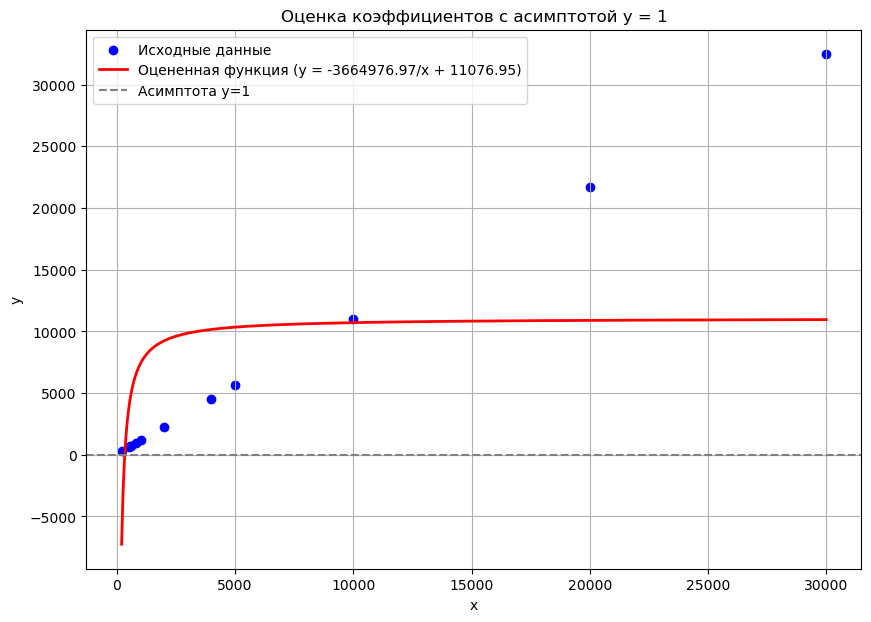

Оцененный коэффициент 'a': -3664976.9677
Свободный член линеаризованной модели 'b': 11075.9456
Асимптота исходной модели (b+1): 11076.9456


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000, 20000, 4000, 30000, 5000])
y_target = np.array([309.7, 631.75, 685.43, 739.1, 1168.5, 953.8, 2242.0, 10994.0, 21729.0, 4553.0, 32464.0, 5626.5])

# 2. Линеаризация данных с учетом асимптоты y=1
X_new = (1 / x_original).reshape(-1, 1)
Y_new = y_target - 1

# 3. Обучение линейной регрессии
model = LinearRegression()
model.fit(X_new, Y_new)

# 4. Построение непрерывной линии регрессии
x_plot = np.linspace(x_original.min(), x_original.max(), 500)
X_plot_new = (1 / x_plot).reshape(-1, 1)
y_plot_pred = model.predict(X_plot_new) + 1

# 5. Вывод графика
plt.figure(figsize=(10, 7))

# Исходные данные
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Оцененная непрерывная функция (ИСПРАВЛЕНО)
# Убран индекс [0] у model.intercept_
plt.plot(x_plot, y_plot_pred, color='red', linewidth=2, label=f'Оцененная функция (y = {model.coef_[0]:.2f}/x + {model.intercept_+1:.2f})')

# Настройка графика
plt.title('Оценка коэффициентов с асимптотой y = 1')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.axhline(y=1, color='gray', linestyle='--', label='Асимптота y=1')
plt.legend()
plt.show()

# 6. Вывод оцененного коэффициента (ИСПРАВЛЕНО)
# Убран индекс [0] у model.intercept_
print(f"Оцененный коэффициент 'a': {model.coef_[0]:.4f}")
print(f"Свободный член линеаризованной модели 'b': {model.intercept_:.4f}")
print(f"Асимптота исходной модели (b+1): {model.intercept_ + 1:.4f}")

# теперь видно, что y = a/x + slope + 1. Вообще не подходит и это просто линейная регрессия


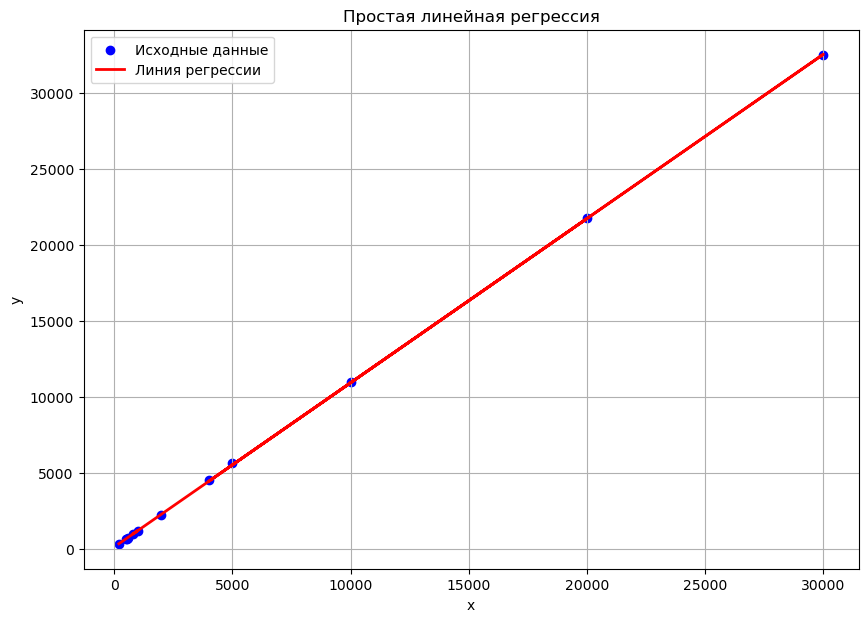

Модель линейной регрессии успешно построена.
Коэффициент наклона (m): 1.0798
Свободный член (b): 124.0116
Уравнение регрессии: y = 1.08x + 124.01


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши исходные данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 2000, 10000, 20000, 4000, 30000, 5000])
y_target = np.array([309.7, 631.75, 685.43, 739.1, 1168.5, 953.8, 2242.0, 10994.0, 21729.0, 4553.0, 32464.0, 5626.5])

# 2. Подготовка данных для Scikit-learn
# Модель ожидает, что X будет двумерным массивом
X_fit = x_original.reshape(-1, 1)

# 3. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_fit, y_target)

# 4. Получение коэффициентов модели
slope = model.coef_[0]  # Коэффициент наклона (m)
intercept = model.intercept_  # Свободный член (b)

# 5. Построение графика
plt.figure(figsize=(10, 7))

# Исходные точки
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Линия регрессии
plt.plot(x_original, model.predict(X_fit), color='red', linewidth=2, label='Линия регрессии')

# Настройка графика
plt.title('Простая линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 6. Вывод уравнения регрессии
print("Модель линейной регрессии успешно построена.")
print(f"Коэффициент наклона (m): {slope:.4f}")
print(f"Свободный член (b): {intercept:.4f}")
print(f"Уравнение регрессии: y = {slope:.2f}x + {intercept:.2f}")

# теперь зная веса, и зная y_target, я могу вычислить x
# y = 638, slope = 124, комиссия 8%, тогда x = 475.92

# снова какая-то дичь 475  - это 604.91, а не 638
# в эмпирич опыте было 500 - это 631.75
# я не знаю в чем ошибка

# сделаю в тупую. отсеку самые большие и посмотрю на график


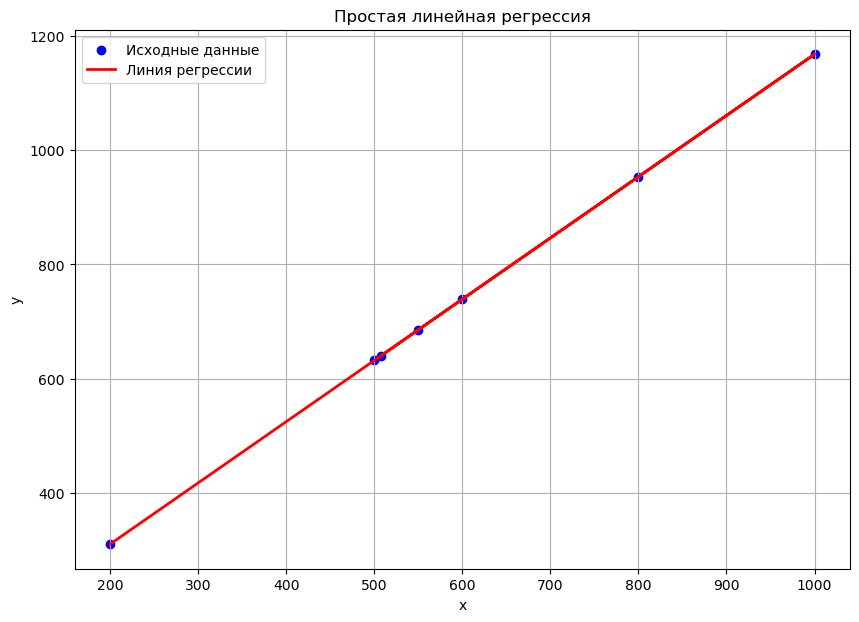

Модель линейной регрессии успешно построена.
Коэффициент наклона (m): 1.0736
Свободный член (b): 94.8597
Уравнение регрессии: y = 1.07x + 94.86


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши исходные данные
x_original = np.array([200, 500, 550, 600, 1000, 800, 507.47])
y_target = np.array([309.7, 631.75, 685.43, 739.1, 1168.5, 953.8, 639.26])

# 2. Подготовка данных для Scikit-learn
# Модель ожидает, что X будет двумерным массивом
X_fit = x_original.reshape(-1, 1)

# 3. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_fit, y_target)

# 4. Получение коэффициентов модели
slope = model.coef_[0]  # Коэффициент наклона (m)
intercept = model.intercept_  # Свободный член (b)

# 5. Построение графика
plt.figure(figsize=(10, 7))

# Исходные точки
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Линия регрессии
plt.plot(x_original, model.predict(X_fit), color='red', linewidth=2, label='Линия регрессии')

# Настройка графика
plt.title('Простая линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 6. Вывод уравнения регрессии
print("Модель линейной регрессии успешно построена.")
print(f"Коэффициент наклона (m): {slope:.4f}")
print(f"Свободный член (b): {intercept:.4f}")
print(f"Уравнение регрессии: y = {slope:.2f}x + {intercept:.2f}")

# совершенно другой slope и коэфф наклона. y = 638, x = 507.47
# проверка и... с комиссией 639.26, внесу коррективы

# снова x = 505 => y_hat = 635.21, y_true = 637.12
# вывожу 505 рублей
# upd мне запретили перевод на карту. Тогда на другой номер телефона, попробую посчитать комиссию



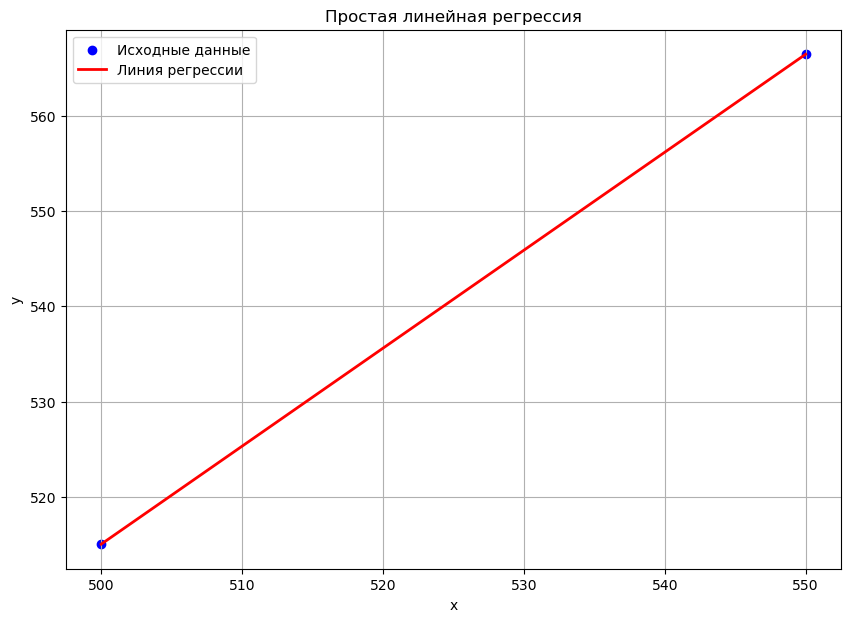

Модель линейной регрессии успешно построена.
Коэффициент наклона (m): 1.0300
Свободный член (b): 0.0000
Уравнение регрессии: y = 1.03x + 0.00


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1. Ваши исходные данные
x_original = np.array([500, 550])
y_target = np.array([515, 566.5])

# 2. Подготовка данных для Scikit-learn
# Модель ожидает, что X будет двумерным массивом
X_fit = x_original.reshape(-1, 1)

# 3. Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_fit, y_target)

# 4. Получение коэффициентов модели
slope = model.coef_[0]  # Коэффициент наклона (m)
intercept = model.intercept_  # Свободный член (b)

# 5. Построение графика
plt.figure(figsize=(10, 7))

# Исходные точки
plt.scatter(x_original, y_target, color='blue', label='Исходные данные')

# Линия регрессии
plt.plot(x_original, model.predict(X_fit), color='red', linewidth=2, label='Линия регрессии')

# Настройка графика
plt.title('Простая линейная регрессия')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# 6. Вывод уравнения регрессии
print("Модель линейной регрессии успешно построена.")
print(f"Коэффициент наклона (m): {slope:.4f}")
print(f"Свободный член (b): {intercept:.4f}")
print(f"Уравнение регрессии: y = {slope:.2f}x + {intercept:.2f}")

# ага, тут комиссия кообще 3% без свободного коэффа
# x = 618, y_hat = 636.18, y_true = 636.54
# перекину рубли на другой номер. выйграю 113 рублей